In [1]:
import warnings
warnings.filterwarnings("ignore")
from modality.datasets import load_biomodal_dataset
# Define some color maps based on the biomodal color scheme
from matplotlib.colors import LinearSegmentedColormap
import pyranges as pr, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

BIOMODAL_COLOR_HEX = ["#003B49", "#9CDBD9", "#F87C56", "#C0DF16", "#05868E"]
sns.set_palette(BIOMODAL_COLOR_HEX)

biomodal_cmap = LinearSegmentedColormap.from_list(
    "biomodal", ["#003B49", "#9CDBD9", "#F87C56"], N=256
)
biomodal_cmap_teal = LinearSegmentedColormap.from_list(
    "biomodal", ["#003B49", "#9CDBD9"], N=256
)

2024-05-30 15:27:49 | INFO | [modality/read_locally.py:20] Setting cache dir as /var/folders/fx/940g93211tl_bk03m1m_sznr0000gn/T. To modify alter the DS_BUCKET_CACHE environment variable


In [2]:
from modality.contig_dataset import ContigDataset
zarr_path = "/Users/lindsey/Desktop/Hodges_Lab/ATAC-me NPCdiff/NPCDiff_ATACme/New_timepoints/data/6l_seq/nf-results_duet-1.2.0_incl_new_additional_samples_GLS_jws_04-04-2024-1356_6bp_sample_outputs_zarr_store_biomodal-hodges-neuro-6l-collab_CG.zarrz"
ds = ContigDataset.from_zarrz(zarr_path)
ds

ContigDataset(data_vars=Data variables:
    num_c        (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_hmc      (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_mc       (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_modc     (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_other    (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_total    (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_total_c  (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>, coords=Coordinates:
    contig        (pos) <U5 dask.array<chunksize=(100000,), meta=np.ndarray>
    group         (sample_id) <U13 '0hr-B' '10274-AJ-0289' ... '8-day-B'
    ref_position  (pos) int64 dask.array<chunksize=(100000,), meta=np.ndarray>
  * sample_id     (sample_id) <U13 '0hr-B' '10274-AJ-0289' ... '8-day-B'
    strand        (pos) <U2 dask.array<chunksize=(100000,), meta=np.ndarray>, attrs={'context': 'CG', 'context_sampling': 1.0, 'contigs': ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM'], 'coordinate_basis': 0, 'fasta_path': 'GRCh38Decoy.fa.block.gz', 'input_path': ['0hr-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0289.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0290.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0291.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '4-day-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '8-day-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz'], 'quant_type': 'quant6L', 'ref_name': 'GRCh38Decoy', 'sample_ids': ['0hr-B', '10274-AJ-0289', '10274-AJ-0290', '10274-AJ-0291', '4-day-B', '8-day-B'], 'slice_chr1': slice(0, 4750318, 1), 'slice_chr10': slice(29992404, 32770360, 1), 'slice_chr11': slice(32770360, 35436588, 1), 'slice_chr12': slice(35436588, 38068524, 1), 'slice_chr13': slice(38068524, 39753462, 1), 'slice_chr14': slice(39753462, 41478318, 1), 'slice_chr15': slice(41478318, 43290370, 1), 'slice_chr16': slice(43290370, 45592152, 1), 'slice_chr17': slice(45592152, 48088808, 1), 'slice_chr18': slice(48088808, 49600836, 1), 'slice_chr19': slice(49600836, 51714166, 1), 'slice_chr2': slice(4750318, 9135658, 1), 'slice_chr20': slice(51714166, 53261120, 1), 'slice_chr21': slice(53261120, 54118812, 1), 'slice_chr22': slice(54118812, 55320596, 1), 'slice_chr3': slice(9135658, 12482244, 1), 'slice_chr4': slice(12482244, 15489102, 1), 'slice_chr5': slice(15489102, 18536520, 1), 'slice_chr6': slice(18536520, 21558898, 1), 'slice_chr7': slice(21558898, 24804548, 1), 'slice_chr8': slice(24804548, 27480948, 1), 'slice_chr9': slice(27480948, 29992404, 1), 'slice_chrM': slice(58304912, 58305782, 1), 'slice_chrX': slice(55320596, 57966014, 1), 'slice_chrY': slice(57966014, 58304912, 1)})

In [3]:
ds.coords["time"] = ("sample_id", ['0hr', '0hr', '4day', '8day', '4day', '8day'])
ds


ContigDataset(data_vars=Data variables:
    num_c        (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_hmc      (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_mc       (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_modc     (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_other    (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_total    (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>
    num_total_c  (pos, sample_id) uint16 dask.array<chunksize=(100000, 6), meta=np.ndarray>, coords=Coordinates:
    contig        (pos) <U5 dask.array<chunksize=(100000,), meta=np.ndarray>
    group         (sample_id) <U13 '0hr-B' '10274-AJ-0289' ... '8-day-B'
    ref_position  (pos) int64 dask.array<chunksize=(100000,), meta=np.ndarray>
  * sample_id     (sample_id) <U13 '0hr-B' '10274-AJ-0289' ... '8-day-B'
    strand        (pos) <U2 dask.array<chunksize=(100000,), meta=np.ndarray>
    time          (sample_id) <U4 '0hr' '0hr' '4day' '8day' '4day' '8day', attrs={'context': 'CG', 'context_sampling': 1.0, 'contigs': ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM'], 'coordinate_basis': 0, 'fasta_path': 'GRCh38Decoy.fa.block.gz', 'input_path': ['0hr-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0289.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0290.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0291.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '4-day-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '8-day-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz'], 'quant_type': 'quant6L', 'ref_name': 'GRCh38Decoy', 'sample_ids': ['0hr-B', '10274-AJ-0289', '10274-AJ-0290', '10274-AJ-0291', '4-day-B', '8-day-B'], 'slice_chr1': slice(0, 4750318, 1), 'slice_chr10': slice(29992404, 32770360, 1), 'slice_chr11': slice(32770360, 35436588, 1), 'slice_chr12': slice(35436588, 38068524, 1), 'slice_chr13': slice(38068524, 39753462, 1), 'slice_chr14': slice(39753462, 41478318, 1), 'slice_chr15': slice(41478318, 43290370, 1), 'slice_chr16': slice(43290370, 45592152, 1), 'slice_chr17': slice(45592152, 48088808, 1), 'slice_chr18': slice(48088808, 49600836, 1), 'slice_chr19': slice(49600836, 51714166, 1), 'slice_chr2': slice(4750318, 9135658, 1), 'slice_chr20': slice(51714166, 53261120, 1), 'slice_chr21': slice(53261120, 54118812, 1), 'slice_chr22': slice(54118812, 55320596, 1), 'slice_chr3': slice(9135658, 12482244, 1), 'slice_chr4': slice(12482244, 15489102, 1), 'slice_chr5': slice(15489102, 18536520, 1), 'slice_chr6': slice(18536520, 21558898, 1), 'slice_chr7': slice(21558898, 24804548, 1), 'slice_chr8': slice(24804548, 27480948, 1), 'slice_chr9': slice(27480948, 29992404, 1), 'slice_chrM': slice(58304912, 58305782, 1), 'slice_chrX': slice(55320596, 57966014, 1), 'slice_chrY': slice(57966014, 58304912, 1)})

In [4]:
ds = ds.groupby("time").sum().transpose()
ds = ds.rename({"time": "sample_id"})
ds = ContigDataset(ds)
ds

ContigDataset(data_vars=Data variables:
    num_c        (pos, sample_id) uint64 dask.array<chunksize=(100000, 1), meta=np.ndarray>
    num_hmc      (pos, sample_id) uint64 dask.array<chunksize=(100000, 1), meta=np.ndarray>
    num_mc       (pos, sample_id) uint64 dask.array<chunksize=(100000, 1), meta=np.ndarray>
    num_modc     (pos, sample_id) uint64 dask.array<chunksize=(100000, 1), meta=np.ndarray>
    num_other    (pos, sample_id) uint64 dask.array<chunksize=(100000, 1), meta=np.ndarray>
    num_total    (pos, sample_id) uint64 dask.array<chunksize=(100000, 1), meta=np.ndarray>
    num_total_c  (pos, sample_id) uint64 dask.array<chunksize=(100000, 1), meta=np.ndarray>, coords=Coordinates:
    contig        (pos) <U5 dask.array<chunksize=(100000,), meta=np.ndarray>
    ref_position  (pos) int64 dask.array<chunksize=(100000,), meta=np.ndarray>
    strand        (pos) <U2 dask.array<chunksize=(100000,), meta=np.ndarray>
  * sample_id     (sample_id) object '0hr' '4day' '8day'
    group         (sample_id) object '0hr' '4day' '8day', attrs={'context': 'CG', 'context_sampling': 1.0, 'contigs': ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM'], 'coordinate_basis': 0, 'fasta_path': 'GRCh38Decoy.fa.block.gz', 'input_path': ['0hr-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0289.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0290.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '10274-AJ-0291.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '4-day-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz', '8-day-B.genome.GRCh38Decoy_primary_assembly.dedup.duet-evoC.CG_quant.tsv.gz'], 'quant_type': 'quant6L', 'ref_name': 'GRCh38Decoy', 'sample_ids': ['0hr-B', '10274-AJ-0289', '10274-AJ-0290', '10274-AJ-0291', '4-day-B', '8-day-B'], 'slice_chr1': slice(0, 4750318, 1), 'slice_chr10': slice(29992404, 32770360, 1), 'slice_chr11': slice(32770360, 35436588, 1), 'slice_chr12': slice(35436588, 38068524, 1), 'slice_chr13': slice(38068524, 39753462, 1), 'slice_chr14': slice(39753462, 41478318, 1), 'slice_chr15': slice(41478318, 43290370, 1), 'slice_chr16': slice(43290370, 45592152, 1), 'slice_chr17': slice(45592152, 48088808, 1), 'slice_chr18': slice(48088808, 49600836, 1), 'slice_chr19': slice(49600836, 51714166, 1), 'slice_chr2': slice(4750318, 9135658, 1), 'slice_chr20': slice(51714166, 53261120, 1), 'slice_chr21': slice(53261120, 54118812, 1), 'slice_chr22': slice(54118812, 55320596, 1), 'slice_chr3': slice(9135658, 12482244, 1), 'slice_chr4': slice(12482244, 15489102, 1), 'slice_chr5': slice(15489102, 18536520, 1), 'slice_chr6': slice(18536520, 21558898, 1), 'slice_chr7': slice(21558898, 24804548, 1), 'slice_chr8': slice(24804548, 27480948, 1), 'slice_chr9': slice(27480948, 29992404, 1), 'slice_chrM': slice(58304912, 58305782, 1), 'slice_chrX': slice(55320596, 57966014, 1), 'slice_chrY': slice(57966014, 58304912, 1)})

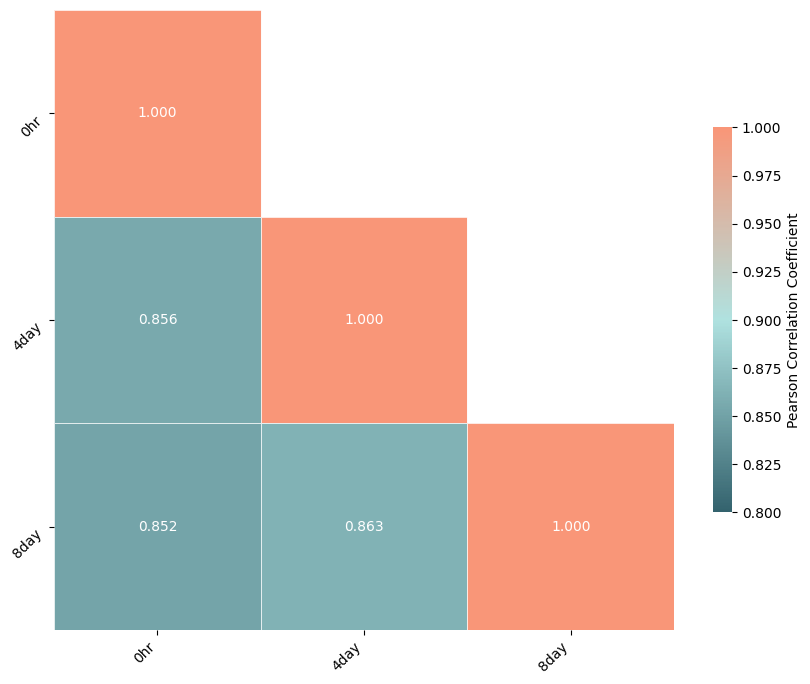

In [5]:
fig, axes = ds.plot_pearson_matrix(
    numerator="num_modc",
    denominator="num_total_c",
    min_coverage=15,
    vmin=0.8,
)

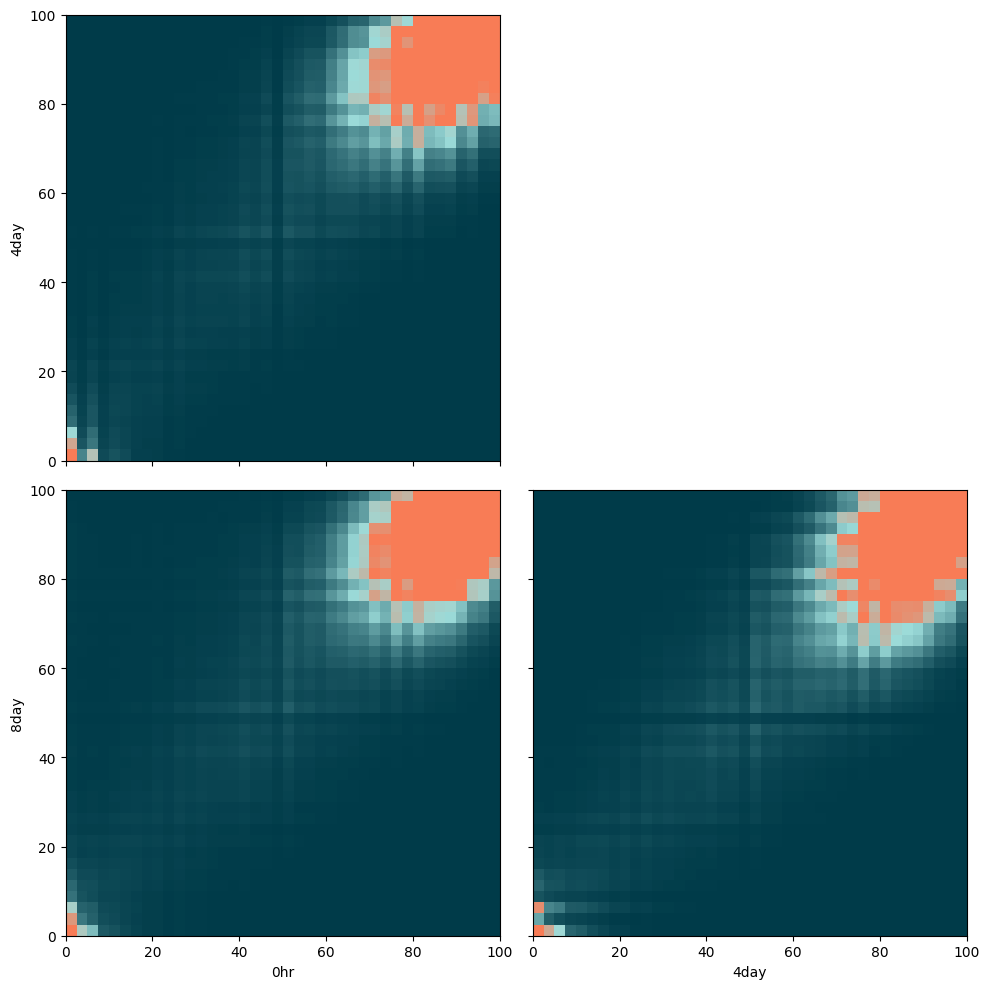

In [6]:
fig, axes = ds.plot_correlation_heatmaps(
    numerator="num_modc",
    denominator="num_total_c",
    min_coverage=15,
)

In [7]:
# Specify some genomic regions for downstream plotting - specified as chr:start-end
sliced_data= {
    "lose": ds["chr19:45394000-45403000"],
    "transient": ds["chr7:43272302-43323299"],
    "gain": ds["chr17:82840000-82875000"]
}


In [8]:
pip install pyranges

Note: you may need to restart the kernel to use updated packages.


In [9]:
row1=sliced_data["lose"].plot_methylation_trace(
    numerators=["num_mc","num_hmc"],
    denominator="num_total_c",
    min_coverage=15,
    title="Methylation trace for region: chr19:45394000-45403000"
)
row2=sliced_data["transient"].plot_methylation_trace(
    numerators=["num_mc","num_hmc"],
    denominator="num_total_c",
    min_coverage=15,
    title="Methylation trace for region: chr7:43272302-43323299"
)
row3=sliced_data["gain"].plot_methylation_trace(
    numerators=["num_mc","num_hmc"],
    denominator="num_total_c",
    min_coverage=15,
    title="Methylation trace for region: chr17:82840000-82875000"
)
row1.figure.savefig("/Users/lindsey/Desktop/Hodges_Lab/ATAC-me NPCdiff/NPCDiff_ATACme/New_timepoints/data/6l_seq/methylation_traces1.pdf")
row2.figure.savefig("/Users/lindsey/Desktop/Hodges_Lab/ATAC-me NPCdiff/NPCDiff_ATACme/New_timepoints/data/6l_seq/methylation_traces2.pdf")
row3.figure.savefig("/Users/lindsey/Desktop/Hodges_Lab/ATAC-me NPCdiff/NPCDiff_ATACme/New_timepoints/data/6l_seq/methylation_traces3.pdf")

KeyError: 'inc'